In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib 
from matplotlib import pyplot as plt
from scipy import fftpack
from scipy import stats

from matplotlib import cm
import random
import warnings

import matplotlib.image as mpimg
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

### Link to dataset. Must have UTSA email to access

In [ ]:
#https://drive.google.com/file/d/1Qa-_zm_zP6mxBJYdcRR7YwGcehbVJ8SO/view?usp=sharing

In [13]:
dxt =  pd.read_csv("C:/Users/julli/Desktop/classes/dxt.csv").dropna()

In [14]:
dxt.head(10)

,Unnamed: 0,HH,HH_1,icetype,HV,geometry,jday
0,0,149.000000,88.000000,2,59.000000,"POLYGON ((-144.959469745712 74.06938132830848,...",335
1,1,142.000000,107.000000,1,53.000000,POLYGON ((-145.0724778374389 74.02497440260562...,335
2,2,160.500000,48.000000,2,87.000000,"POLYGON ((-145.166166156247 73.9879255383776, ...",335
3,3,149.000000,87.000000,2,60.000000,MULTIPOLYGON (((-145.4344979880491 73.89654245...,335
4,4,157.000000,57.000000,3,79.000000,POLYGON ((-145.7009974453218 73.77228602079651...,335
5,5,155.000000,63.000000,3,77.000000,"POLYGON ((-146.025764787868 73.63780996923603,...",335
6,6,152.000000,68.000000,3,76.000000,POLYGON ((-146.2038620376282 73.56289860703123...,335
7,7,154.000000,64.000000,2,79.000000,POLYGON ((-146.6765925212046 73.35993675807399...,335
8,8,151.846154,71.384615,3,73.076923,POLYGON ((-146.9682765329848 73.23163605899911...,335
9,9,155.000000,61.000000,2,79.000000,POLYGON ((-147.6041472837618 72.94348331820399...,335


In [15]:
dxt = dxt[['HH','HH_1','HV','icetype','geometry','jday']]
dxt.head(10)

,HH,HH_1,HV,icetype,geometry,jday
0,149.000000,88.000000,59.000000,2,"POLYGON ((-144.959469745712 74.06938132830848,...",335
1,142.000000,107.000000,53.000000,1,POLYGON ((-145.0724778374389 74.02497440260562...,335
2,160.500000,48.000000,87.000000,2,"POLYGON ((-145.166166156247 73.9879255383776, ...",335
3,149.000000,87.000000,60.000000,2,MULTIPOLYGON (((-145.4344979880491 73.89654245...,335
4,157.000000,57.000000,79.000000,3,POLYGON ((-145.7009974453218 73.77228602079651...,335
5,155.000000,63.000000,77.000000,3,"POLYGON ((-146.025764787868 73.63780996923603,...",335
6,152.000000,68.000000,76.000000,3,POLYGON ((-146.2038620376282 73.56289860703123...,335
7,154.000000,64.000000,79.000000,2,POLYGON ((-146.6765925212046 73.35993675807399...,335
8,151.846154,71.384615,73.076923,3,POLYGON ((-146.9682765329848 73.23163605899911...,335
9,155.000000,61.000000,79.000000,2,POLYGON ((-147.6041472837618 72.94348331820399...,335


In [16]:
pca = PCA(2)

In [32]:
xpca = dxt.iloc[:, 0:4]
pca.fit(xpca)

PCA(n_components=2)

In [33]:
xpca.head(5)

,HH,HH_1,HV,icetype
0,149.0,88.0,59.0,2
1,142.0,107.0,53.0,1
2,160.5,48.0,87.0,2
3,149.0,87.0,60.0,2
4,157.0,57.0,79.0,3


In [34]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.36215054  0.88781935 -0.28393514  0.00215139]
 [ 0.4499539  -0.10026824 -0.88739789  0.00357068]]
[729.36988294  33.0783337 ]


In [35]:
B = pca.transform(xpca)
print(B)

[[  9.49215198  13.18076858]
 [ 30.59723281  13.4468115 ]
 [-38.13553705  -2.48117318]
 ...
 [  3.55538919 -10.98173402]
 [  2.59580863  -9.53340196]
 [  3.55538919 -10.98173402]]


In [36]:
scaler = StandardScaler()
scaler.fit(xpca)

StandardScaler()

In [37]:
scaled_data = scaler.transform(xpca)

In [38]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [39]:
x_pca = pca.transform(scaled_data)
x_pca

array([[ 0.87485395,  0.4240801 ],
       [ 2.05872388,  1.41486864],
       [-2.43534031,  0.26623555],
       ...,
       [-0.08156115,  1.33292321],
       [ 0.04328862, -1.44409839],
       [-0.08156115,  1.33292321]])

In [40]:
x_pca[:,0],x_pca[:,1]

(array([ 0.87485395,  2.05872388, -2.43534031, ..., -0.08156115,
         0.04328862, -0.08156115]),
 array([ 0.4240801 ,  1.41486864,  0.26623555, ...,  1.33292321,
        -1.44409839,  1.33292321]))

Text(0.5, 1.0, 'Principal components - December 2020')

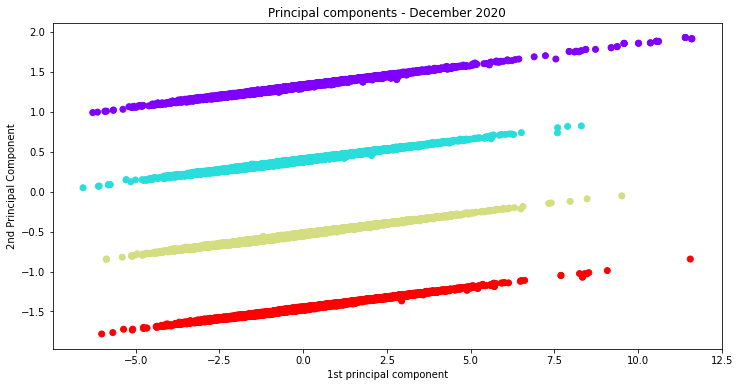

In [41]:
figx = plt.figure(figsize=(12,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=dxt['icetype'],cmap='rainbow')
plt.xlabel('1st principal component')
plt.ylabel('2nd Principal Component')
plt.title('Principal components - December 2020')
#figx.savefig('/content/drive/My Drive/sar_fraction/prince.png')

<AxesSubplot:title={'center':'Correlation heatmap - December 2020'}>

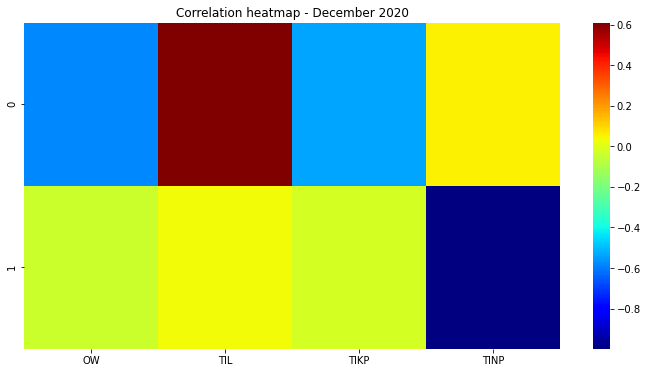

In [42]:
figdec = plt.figure(figsize=(12,6))
map = pd.DataFrame(pca.components_,columns=['OW','TIL','TIKP','TINP'])
plt.title('Correlation heatmap - December 2020')
sns.heatmap(map,cmap='jet')
#figdec.savefig('/content/drive/My Drive/sar_fraction/cordec.png')